In [40]:
import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime


In [41]:
dataset = gpd.read_file("./example_dataset.geojson")

DateList = dataset['sowing_date'].tolist()
NonApril = len(list(filter(lambda x: datetime.strptime(x,'%Y-%m-%d').month != 4 , DateList)))
print(f'count of non-april crops: {NonApril}')

count of non-april crops: 421


In [42]:
dataset['relative_error'] = abs((dataset['actual_yield'] - dataset['model_yield']) / dataset['actual_yield'])
dataset

,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,relative_error
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((28.16611 49.21513, 28.16624 49...",0.171447
1,maiz,2016-04-11,7900.0,MS_VN_03_405,11.547103,574.831401,8814.0,"MULTIPOLYGON (((28.16966 49.19427, 28.16936 49...",0.115696
2,maiz,2016-04-12,7900.0,PA_KM_05_1802,12.190627,637.703767,8317.0,"MULTIPOLYGON (((27.30659 48.87534, 27.30674 48...",0.052785
3,maiz,2016-04-12,9000.0,MS_VN_03_410,11.756031,588.947718,8878.0,"MULTIPOLYGON (((28.11488 49.21303, 28.11503 49...",0.013556
4,maiz,2016-04-12,12100.0,KI_VN_10_0308,11.584644,595.795305,8996.0,"MULTIPOLYGON (((28.86633 49.22147, 28.86651 49...",0.256529
...,...,...,...,...,...,...,...,...,...
995,sun,2016-03-17,3500.0,MS_VN_05_404,12.320602,707.572858,3031.0,"MULTIPOLYGON (((29.54161 48.18456, 29.54175 48...",0.134000
996,sun,2016-03-18,2800.0,MS_VN_05_403,12.320602,714.889644,3031.0,"MULTIPOLYGON (((29.54068 48.18854, 29.54078 48...",0.082500
997,sun,2016-03-19,2700.0,MS_VN_05_401,12.320602,715.260919,3031.0,"MULTIPOLYGON (((29.53621 48.19609, 29.53623 48...",0.122593
998,sun,2016-03-30,1800.0,PA_KM_05_410,12.204410,646.383868,3340.0,"MULTIPOLYGON (((27.12298 48.64148, 27.12301 48...",0.855556


In [43]:
MaxErrorField = dataset.loc[dataset['relative_error'].idxmax()]
MaxErrorValue = dataset['relative_error'].max()

MinErrorField= dataset.loc[dataset['relative_error'].idxmin()]
MinErrorValue = dataset['relative_error'].min()

print(f"Field with maximum relative error: {MaxErrorField}, error value: {MaxErrorValue}")
print(f"\nField with minimum relative error: {MinErrorField}, error value: {MinErrorValue}")



Field with maximum relative error: crop_name                                                       maiz
sowing_date                                               2017-04-28
actual_yield                                                  1500.0
field_id                                                KI_VN_08_405
avg_temperature                                            11.707561
avg_rainfall                                              641.750403
model_yield                                                   6262.0
geometry           MULTIPOLYGON (((29.395252000008373 48.23347100...
relative_error                                              3.174667
Name: 213, dtype: object, error value: 3.1746666666666665

Field with minimum relative error: crop_name                                                        soy
sowing_date                                               2018-05-09
actual_yield                                                  2600.0
field_id                                   

In [44]:
centroids = dataset.centroid
dataset['Centroids'] = centroids
dataset.head(3)

C:\Users\User\AppData\Local\Temp\ipykernel_7144\1106740954.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = dataset.centroid


,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,relative_error,Centroids
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((28.16611 49.21513, 28.16624 49...",0.171447,POINT (28.16355 49.21292)
1,maiz,2016-04-11,7900.0,MS_VN_03_405,11.547103,574.831401,8814.0,"MULTIPOLYGON (((28.16966 49.19427, 28.16936 49...",0.115696,POINT (28.15958 49.20348)
2,maiz,2016-04-12,7900.0,PA_KM_05_1802,12.190627,637.703767,8317.0,"MULTIPOLYGON (((27.30659 48.87534, 27.30674 48...",0.052785,POINT (27.29955 48.87375)


In [45]:
dataset['Area'] = dataset.area
dataset.head(3)

C:\Users\User\AppData\Local\Temp\ipykernel_7144\1073209693.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dataset['Area'] = dataset.area


,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,relative_error,Centroids,Area
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((28.16611 49.21513, 28.16624 49...",0.171447,POINT (28.16355 49.21292),0.000039
1,maiz,2016-04-11,7900.0,MS_VN_03_405,11.547103,574.831401,8814.0,"MULTIPOLYGON (((28.16966 49.19427, 28.16936 49...",0.115696,POINT (28.15958 49.20348),0.000265
2,maiz,2016-04-12,7900.0,PA_KM_05_1802,12.190627,637.703767,8317.0,"MULTIPOLYGON (((27.30659 48.87534, 27.30674 48...",0.052785,POINT (27.29955 48.87375),0.000027


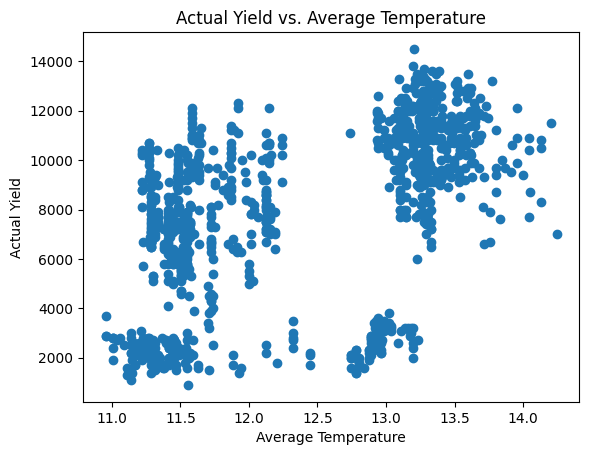

In [46]:
plt.scatter(dataset['avg_temperature'], dataset['actual_yield'])
plt.xlabel('Average Temperature')
plt.ylabel('Actual Yield')
plt.title('Actual Yield vs. Average Temperature')

plt.show()

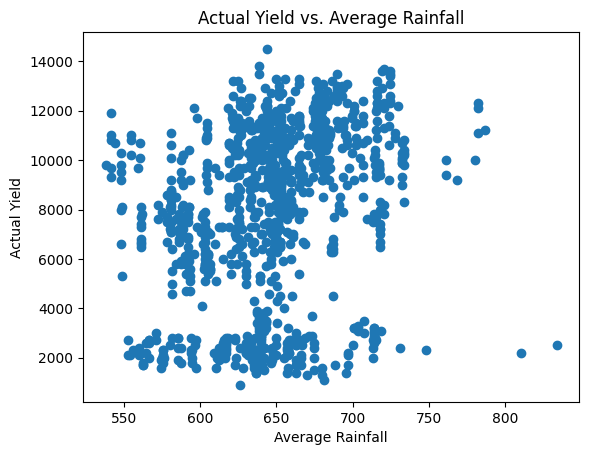

In [47]:
plt.scatter(dataset['avg_rainfall'], dataset['actual_yield'])
plt.xlabel('Average Rainfall')
plt.ylabel('Actual Yield')
plt.title('Actual Yield vs. Average Rainfall')

plt.show()

In [39]:
# датасет бідняга, не хоче записуватись в новий файл
dataset.to_file('updated_dataset.geojson', driver='GeoJSON')

TypeError: Cannot interpret '<geopandas.array.GeometryDtype object at 0x00000206142C6730>' as a data type